# Assignment 1 for Machine Learning Class

![Assignment Image](image.png)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Qn 1: Political Parties in 2017

In [19]:
df1 = pd.read_csv("../data/general_elections_2017.csv")
df1

,no,candidate_name,political_party,valid_votes
0,1,John Ekuru Longoggy Aukot,Thirdway Alliance Kenya,"27,311"
1,2,Mohamed Abduba Dida,Alliance For Real Change,"38,093"
2,3,Shakhalaga Khwa Jirongo,United Democratic Party,"11,705"
3,4,Japheth Kavinga Kaluyu,Independent1,"16,482"
4,5,Uhuru Kenyatta,Jubilee Party,"8,203,290"
5,6,Michael Wainaina Mwaura,Independent2,"13,257"
6,7,Joseph William Nthiga Nyagah,Independent3,"42,259"
7,8,Raila Odinga,Orange Democratic Movement,"6,762,224"


In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   no               8 non-null      int64 
 1   candidate_name   8 non-null      object
 2   political_party  8 non-null      object
 3   valid_votes      8 non-null      object
dtypes: int64(1), object(3)
memory usage: 388.0+ bytes


In [21]:
df1['valid_votes'] = df1['valid_votes'].str.replace(',', '').astype(int)
df1.dtypes

no                  int64
candidate_name     object
political_party    object
valid_votes         int64
dtype: object

In [22]:
df1['percentage_valid_votes'] = df1['valid_votes'] / df1['valid_votes'].sum() * 100
df1['percentage_valid_votes'] = df1['percentage_valid_votes'].round(2)
df1

,no,candidate_name,political_party,valid_votes,percentage_valid_votes
0,1,John Ekuru Longoggy Aukot,Thirdway Alliance Kenya,27311,0.18
1,2,Mohamed Abduba Dida,Alliance For Real Change,38093,0.25
2,3,Shakhalaga Khwa Jirongo,United Democratic Party,11705,0.08
3,4,Japheth Kavinga Kaluyu,Independent1,16482,0.11
4,5,Uhuru Kenyatta,Jubilee Party,8203290,54.27
5,6,Michael Wainaina Mwaura,Independent2,13257,0.09
6,7,Joseph William Nthiga Nyagah,Independent3,42259,0.28
7,8,Raila Odinga,Orange Democratic Movement,6762224,44.74


Classify those with less than 1% votes as others

In [23]:
df1.loc[df1['percentage_valid_votes'] < 1, 'political_party'] = 'Others'
df1

,no,candidate_name,political_party,valid_votes,percentage_valid_votes
0,1,John Ekuru Longoggy Aukot,Others,27311,0.18
1,2,Mohamed Abduba Dida,Others,38093,0.25
2,3,Shakhalaga Khwa Jirongo,Others,11705,0.08
3,4,Japheth Kavinga Kaluyu,Others,16482,0.11
4,5,Uhuru Kenyatta,Jubilee Party,8203290,54.27
5,6,Michael Wainaina Mwaura,Others,13257,0.09
6,7,Joseph William Nthiga Nyagah,Others,42259,0.28
7,8,Raila Odinga,Orange Democratic Movement,6762224,44.74


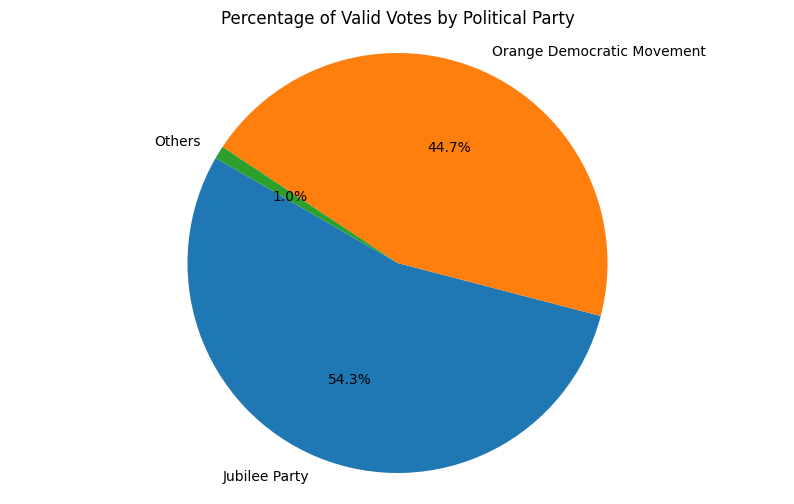

In [24]:
plt.figure(figsize=(10, 6))

# Group by political party and sum the percentages
grouped = df1.groupby('political_party')['percentage_valid_votes'].sum()

# Plot the pie chart
plt.pie(grouped, labels=grouped.index, autopct='%1.1f%%', startangle=150)
plt.axis('equal')  # Equal asp
plt.title('Percentage of Valid Votes by Political Party')
plt.show()

## Qn 2: Fibonnaci numbers

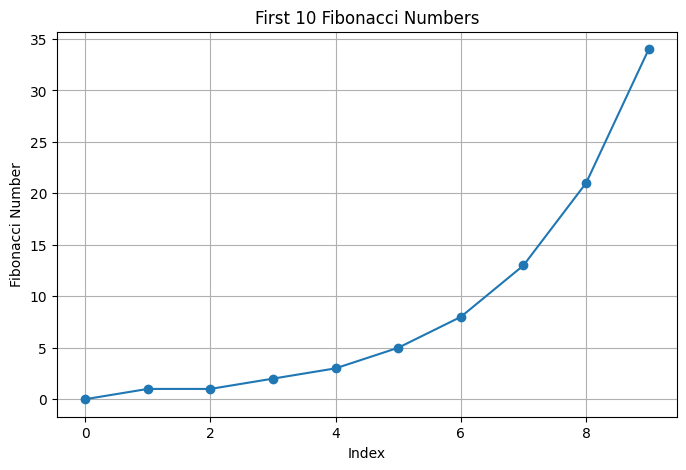

In [25]:
fibonacci = [0, 1]
for i in range(2, 10):
    fibonacci.append(fibonacci[-1] + fibonacci[-2])

# Plot
plt.figure(figsize=(8, 5))

plt.plot(range(10), fibonacci, marker='o', linestyle='-')
plt.title('First 10 Fibonacci Numbers')
plt.xlabel('Index')
plt.ylabel('Fibonacci Number')
plt.grid(True)
plt.show()

## Qn 3: Total profit

In [26]:
df2 = pd.read_csv("../data/monthly_profits.csv")
df2.head()

,Month,Total Profit
0,January,5500
1,February,6200
2,March,7100
3,April,6800
4,May,7500


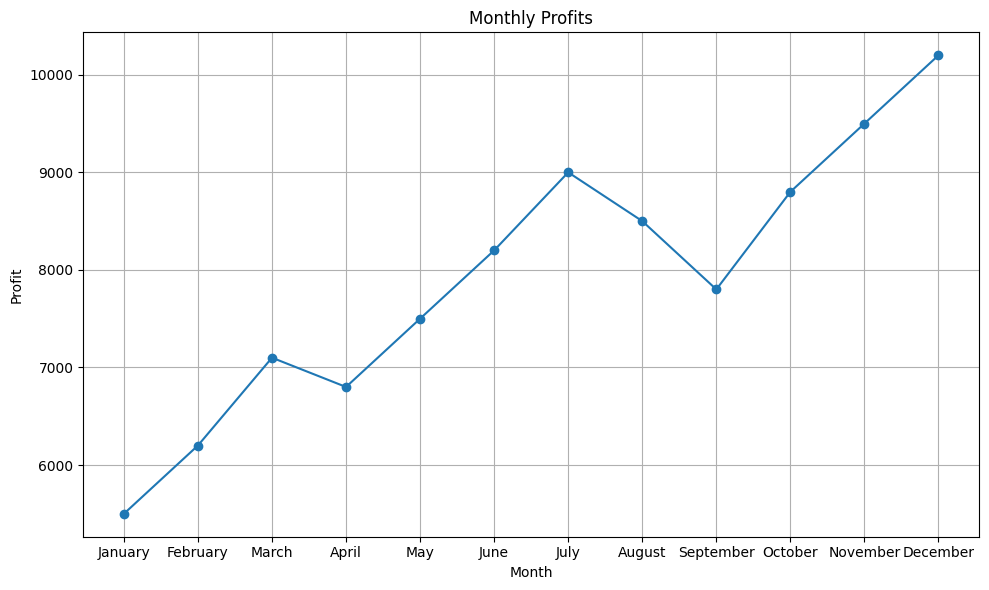

In [27]:
plt.figure(figsize=(10, 6))

# Plot the line chart
plt.plot(df2['Month'], df2['Total Profit'], marker='o', linestyle='-')
plt.title('Monthly Profits')
plt.xlabel('Month')
plt.ylabel('Profit')
plt.grid(True)
plt.tight_layout()
plt.show()

## Qn 4: Units sold per product

In [28]:
df3 = pd.read_csv("../data/company_sales_data.csv")
df3

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600
5,6,2760,1555,4890,7490,1890,1555,20140,201400
6,7,2980,1120,4780,8980,1780,1120,29550,295500
7,8,3700,1400,5860,9960,2860,1400,36140,361400
8,9,3540,1780,6100,8100,2100,1780,23400,234000
9,10,1990,1890,8300,10300,2300,1890,26670,266700


facecream       34480
facewash        18515
toothpaste      69910
bathingsoap    114010
shampoo         25410
moisturizer     18515
dtype: int64


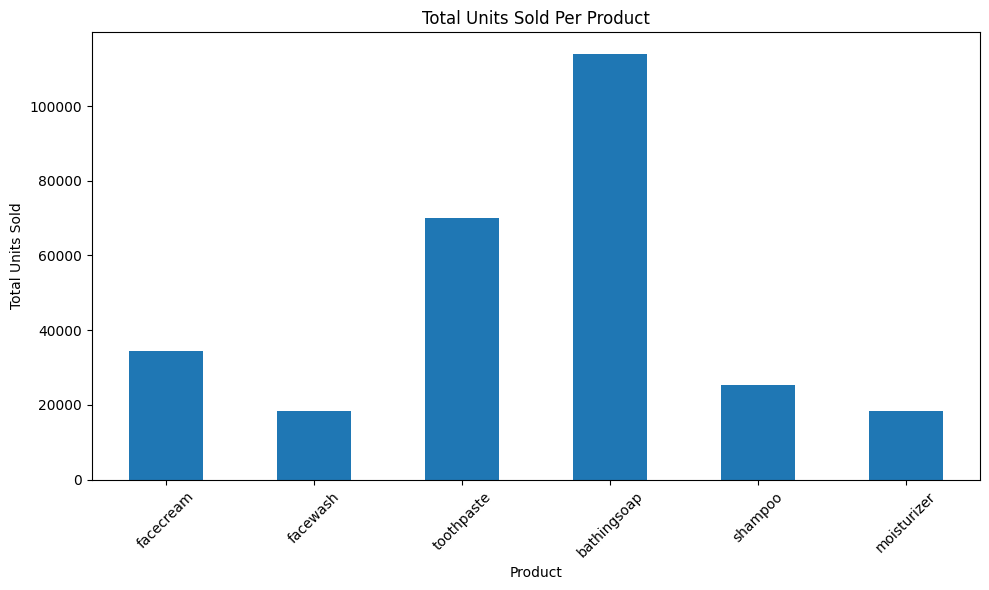

In [29]:
# Sum total units sold per product
product_totals = df3[['facecream', 'facewash', 'toothpaste', 'bathingsoap', 'shampoo', 'moisturizer']].sum()
print(product_totals)
# Plot
plt.figure(figsize=(10, 6))
product_totals.plot(kind='bar')

plt.title('Total Units Sold Per Product')
plt.xlabel('Product')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Qn 6: Facecream and Facewash sales

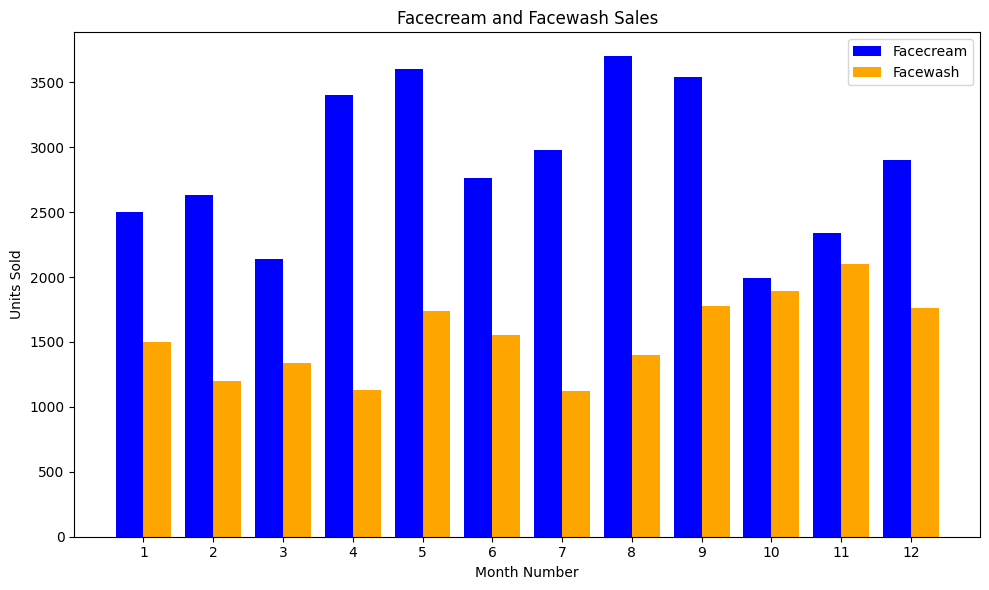

In [30]:
# Extract facecream and facewash sales data
facecream_facewash = df3[['month_number', 'facecream', 'facewash']]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(facecream_facewash['month_number'] - 0.2, facecream_facewash['facecream'], width=0.4, label='Facecream', color='blue')
plt.bar(facecream_facewash['month_number'] + 0.2, facecream_facewash['facewash'], width=0.4, label='Facewash', color='orange')

plt.title('Facecream and Facewash Sales')
plt.xlabel('Month Number')
plt.ylabel('Units Sold')
plt.xticks(facecream_facewash['month_number'])
plt.legend()
plt.tight_layout()
plt.show()